In [4]:
from pathlib import Path
import duckdb, pandas as pd
import matplotlib.pyplot as plt
import numpy as np
db_path = (Path.cwd().parent / "pl.duckdb") 
con = duckdb.connect(str(db_path)) 
df = con.execute("""
WITH long AS (
  SELECT League, Date, Home_Team AS team, Home_Team_Fouls AS fouls
  FROM matches
  UNION ALL
  SELECT League, Date, Away_Team, Away_Team_Fouls
  FROM matches
)
SELECT League, team, Date, fouls
FROM long;
""").df()

/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_2481/3407354138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="League", y="fouls", data=df, inner="box", palette="Set2")


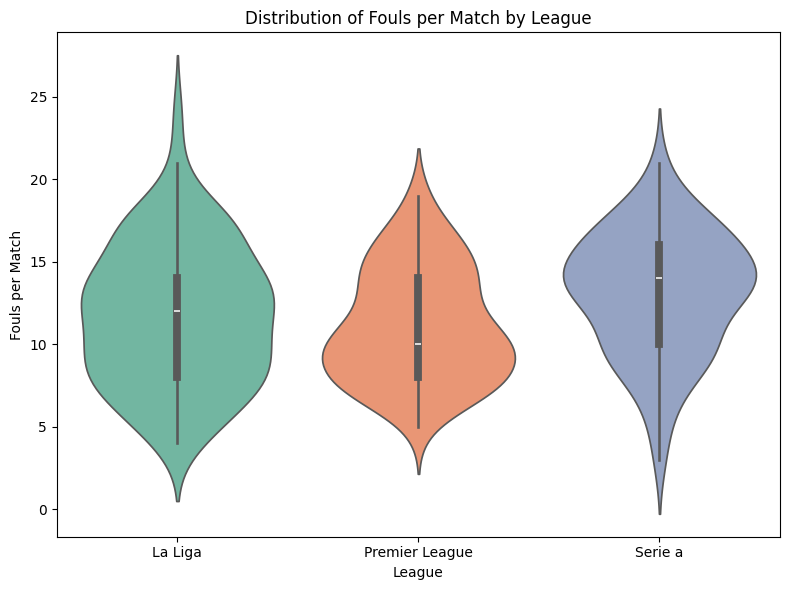

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.violinplot(x="League", y="fouls", data=df, inner="box", palette="Set2")

plt.title("Distribution of Fouls per Match by League")
plt.ylabel("Fouls per Match")
plt.xlabel("League")
plt.tight_layout()
plt.savefig("../figures/violin_fouls_by_league.png", dpi=300)
plt.show()